In [105]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm
from sklearn import metrics 
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from scipy.stats import zscore
from sklearn.neighbors import KNeighborsClassifier

In [11]:
bankdata = pd.read_csv(r'C:\Users\premf\OneDrive\Documents\AIML\Lab Exercise\Bank_Personal_Loan_Modelling.csv')

In [24]:
#Data has 5000 rows and 14 columns in it 
bankdata.shape

(5000, 14)

In [25]:
#Pulling the head to chek the data load 
bankdata.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [16]:
#Checking if there are any null values in the data
bankdata.isnull().values.any()

False

In [17]:
#Trying to understand the data. All columns have equal count so no missing data 
bankdata.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [12]:
#Dropping ID column as it will not have any impact on prediction 
bankdata = bankdata.drop(['ID'],axis=1)

In [7]:
#Checking whether the ID column is dropped
bankdata.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [13]:
# Replacing Education column categorical values with actual values 
bankdata['Education'] = bankdata['Education'].replace({1:'Undergrad',2:'Graduate',3:'Advanced/Professional'})
bankdata.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,Undergrad,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,Undergrad,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,Undergrad,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,Graduate,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,Graduate,0,0,0,0,0,1


In [14]:
#Creating Dummy variables for the Education Column 
bankdata = pd.get_dummies(bankdata, columns=['Education'])
bankdata.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_Advanced/Professional,Education_Graduate,Education_Undergrad
0,25,1,49,91107,4,1.6,0,0,1,0,0,0,0,0,1
1,45,19,34,90089,3,1.5,0,0,1,0,0,0,0,0,1
2,39,15,11,94720,1,1.0,0,0,0,0,0,0,0,0,1
3,35,9,100,94112,1,2.7,0,0,0,0,0,0,0,1,0
4,35,8,45,91330,4,1.0,0,0,0,0,0,1,0,1,0


In [16]:
#Checking to make sure there is no field with data type as object
bankdata.dtypes

Age                                  int64
Experience                           int64
Income                               int64
ZIP Code                             int64
Family                               int64
CCAvg                              float64
Mortgage                             int64
Personal Loan                        int64
Securities Account                   int64
CD Account                           int64
Online                               int64
CreditCard                           int64
Education_Advanced/Professional      uint8
Education_Graduate                   uint8
Education_Undergrad                  uint8
dtype: object

# Data Analysis(EDA)

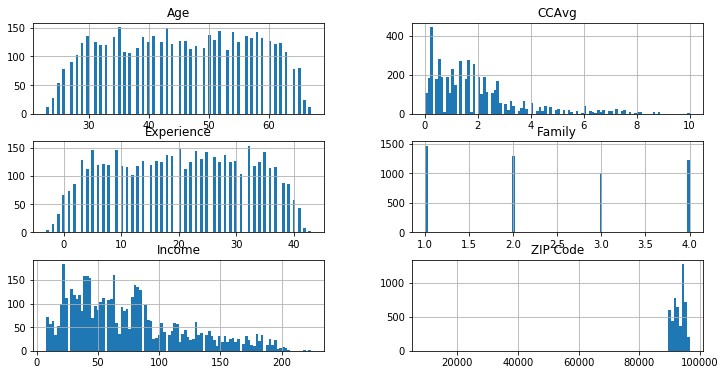

In [18]:
#Plotting the histogram to see the data distributions for non categorical variables 
columns = list(bankdata)[0:-9]
bankdata[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2));

#From the below Historgram, Age and Experience are widely sperad across and almost evenly distributed.
#Zipcode we have to do a pairplot and find if it has impact on personal loan or drop it 
#We have to find if the Income, Credit card spend and Personal Loan has any impact as ther 

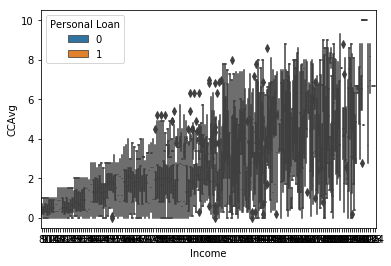

In [21]:
sns.boxplot(bankdata['Income'], bankdata['CCAvg'], hue=bankdata['Personal Loan'])

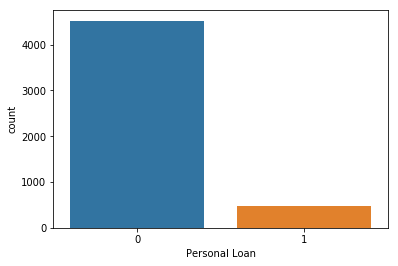

In [23]:
#Checking the count of Customers who took Personal loan vs Not
sns.countplot(bankdata['Personal Loan'])

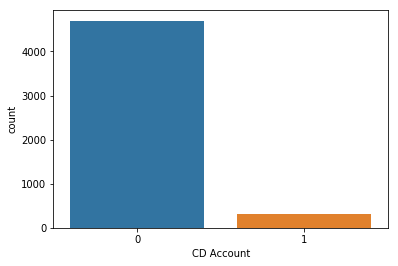

In [24]:
# Checking the number of customers who have deposit vs not. It looks many customers doesnt have a deposit with the bank
sns.countplot(bankdata['CD Account'])

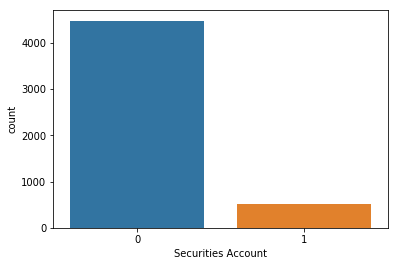

In [26]:
#The number of customers who have Securities are more than the CD Accounts 
sns.countplot(bankdata['Securities Account'])

In [28]:
# Lets do a correlation map to see if the Zipcode has any coorleation with other data
bankdata.corr()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_Advanced/Professional,Education_Graduate,Education_Undergrad
Age,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681,0.045838,-0.016264,-0.027770
Experience,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967,0.020967,-0.018197,-0.002907
Income,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385,-0.108878,-0.128364,0.218019
ZIP Code,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691,-0.034123,0.037141,-0.002122
Family,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588,-0.008744,0.139201,-0.118628
CCAvg,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689,-0.080413,-0.090366,0.156979
Mortgage,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231,-0.014942,-0.031806,0.042841
Personal Loan,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802,0.090212,0.071491,-0.148894
Securities Account,-0.000436,-0.001232,-0.002616,0.004704,0.019994,0.015086,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028,-0.012421,0.005134,0.006863
CD Account,0.008043,0.010353,0.169738,0.019972,0.014110,0.136534,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644,0.009780,0.006089,-0.014630


In [42]:
def plot_corr(df, size=40):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size,size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

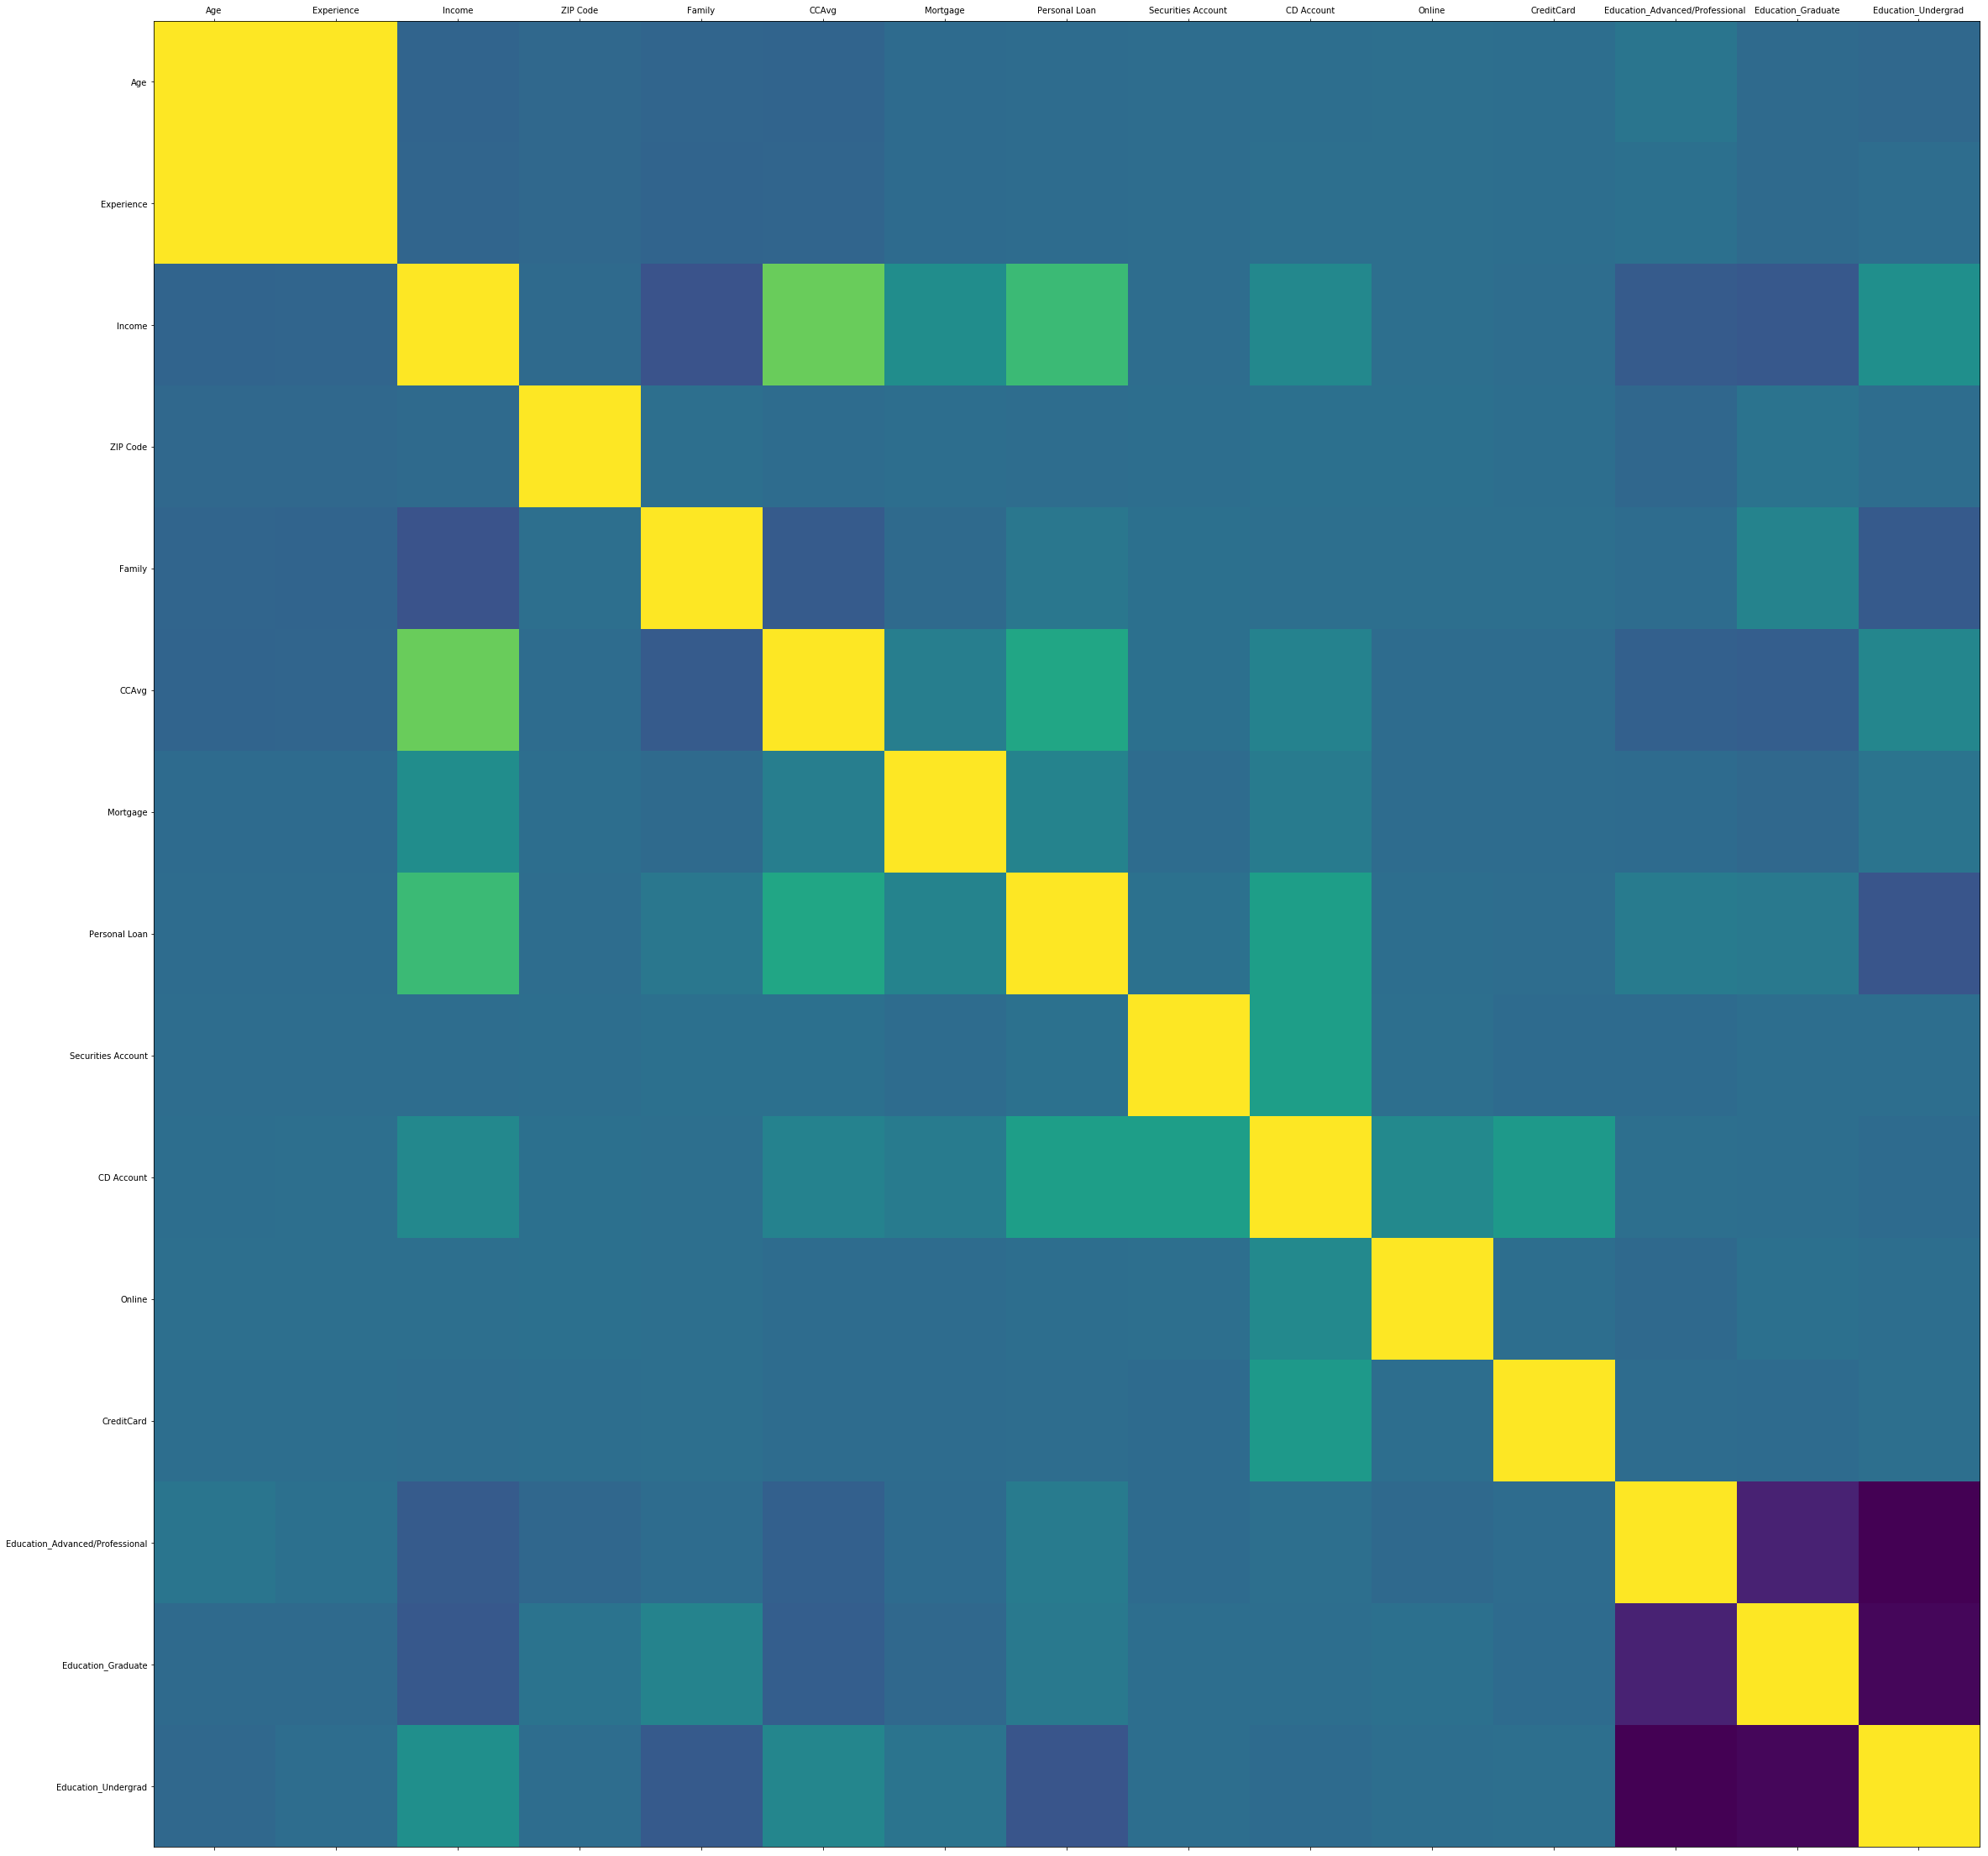

In [43]:
plot_corr(bankdata)
#Yellow represent maximum coorleation and Blue is minimum coorleation 
#Personal Loan has good coorelation with Income, CCAvg, CDAccount

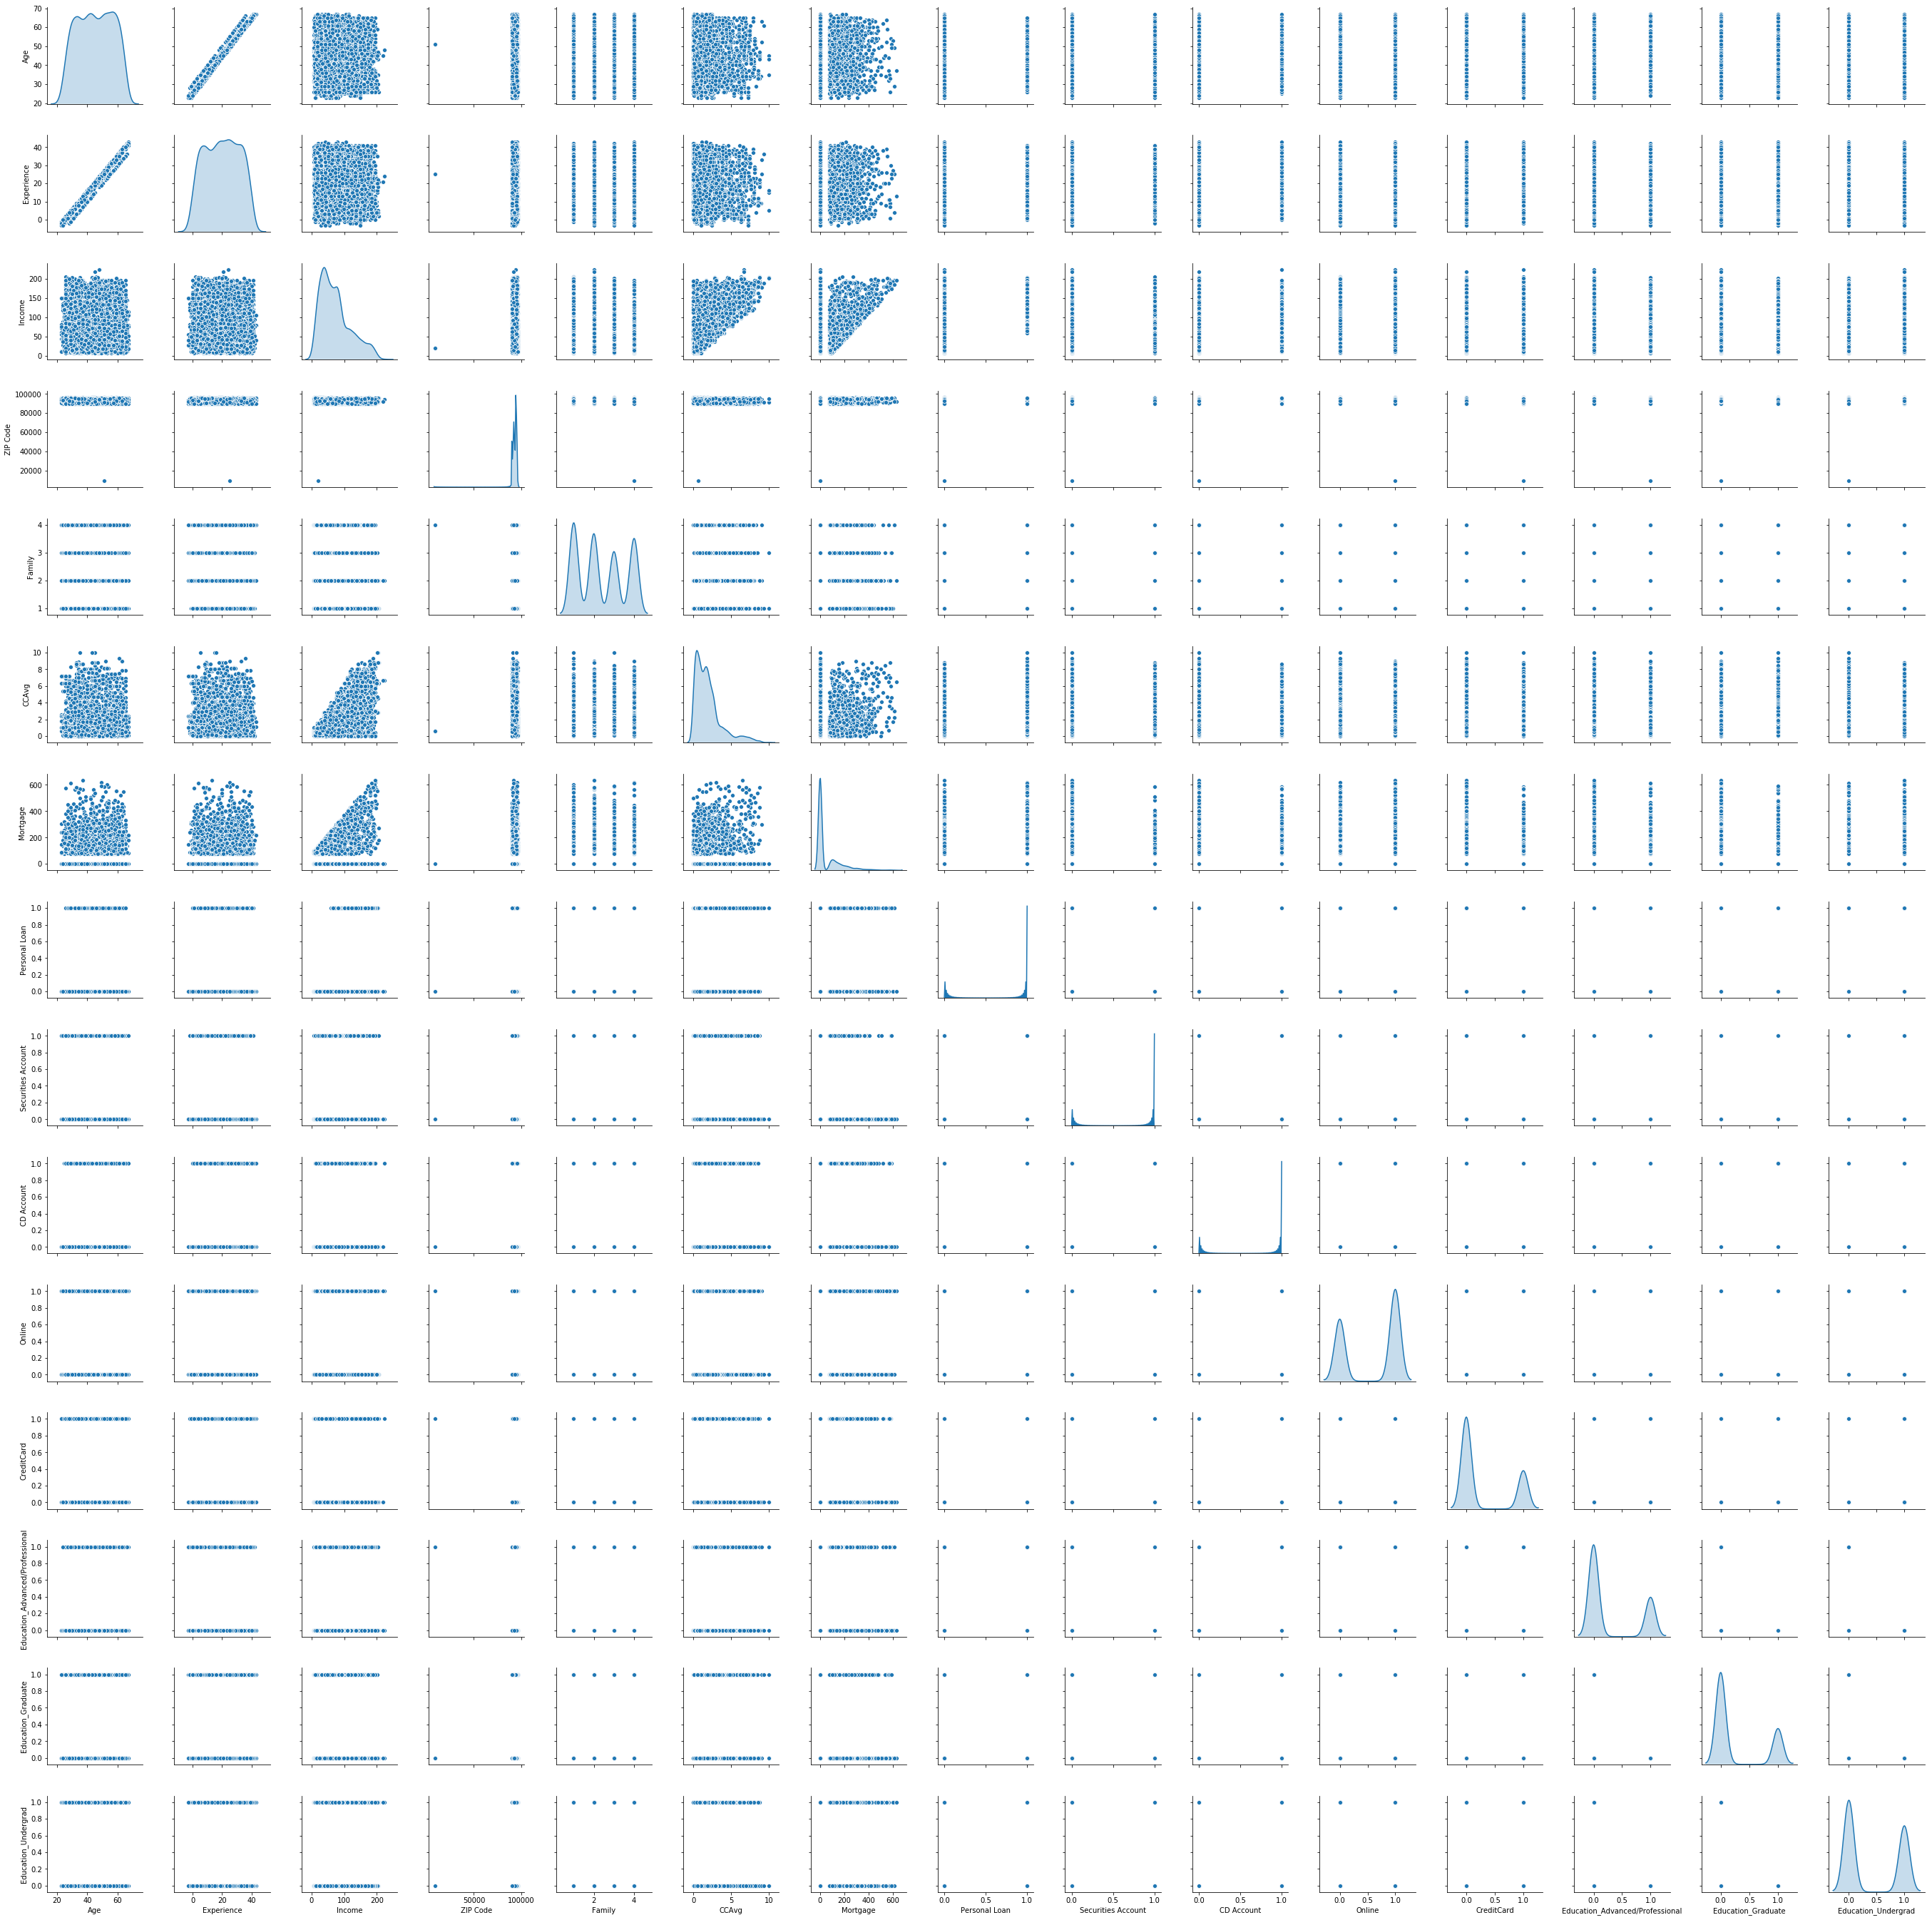

In [44]:
# Lets further analyze using pair plot 
sns.pairplot(bankdata,diag_kind="kde")

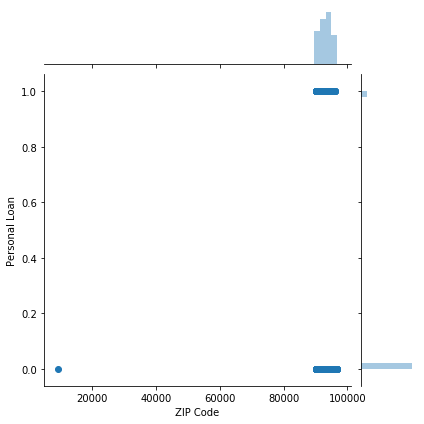

In [46]:
#From the cooreleation the Zip code has very very less coorleation with the personal loan. Lets do a joint plot to check before dropping that column
sns.jointplot(bankdata['ZIP Code'], bankdata['Personal Loan'])

In [50]:
# As ZipCode has very less coorleation and very less impact towards personal loan dropping that column
bankdata = bankdata.drop(['ZIP Code'],axis=1)

In [51]:
bankdata.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_Advanced/Professional,Education_Graduate,Education_Undergrad
0,25,1,49,4,1.6,0,0,1,0,0,0,0,0,1
1,45,19,34,3,1.5,0,0,1,0,0,0,0,0,1
2,39,15,11,1,1.0,0,0,0,0,0,0,0,0,1
3,35,9,100,1,2.7,0,0,0,0,0,0,0,1,0
4,35,8,45,4,1.0,0,0,0,0,0,1,0,1,0


# Splitting Training and Test Data

In [119]:
#Preparing the data for the model. Since Personal loan is the prediction column assign it to Y
x= bankdata.drop(['Personal Loan'],axis=1)
y = bankdata['Personal Loan']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

x_train.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_Advanced/Professional,Education_Graduate,Education_Undergrad
1334,47,22,35,2,1.3,0,0,0,1,0,0,0,1
4768,38,14,39,1,2.0,0,0,0,1,0,0,1,0
65,59,35,131,1,3.8,0,0,0,1,1,0,0,1
177,29,3,65,4,1.8,244,0,0,0,0,0,1,0
4489,39,13,21,3,0.2,0,0,0,1,0,0,1,0


In [58]:
x_train.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_Advanced/Professional,Education_Graduate,Education_Undergrad
1334,47,22,35,2,1.3,0,0,0,1,0,0,0,1
4768,38,14,39,1,2.0,0,0,0,1,0,0,1,0
65,59,35,131,1,3.8,0,0,0,1,1,0,0,1
177,29,3,65,4,1.8,244,0,0,0,0,0,1,0
4489,39,13,21,3,0.2,0,0,0,1,0,0,1,0


# Logistic Regression Model

In [66]:
#Fit a logisitic regression model on train data
ploan_lr_model = LogisticRegression(solver='liblinear')
ploan_lr_model.fit(x_train,y_train.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [69]:
#Predict on test 
y_predict = ploan_lr_model.predict(x_test)

#Finding the coefficient and intercept 
coef_df = pd.DataFrame(ploan_lr_model.coef_)
coef_df['intercept'] = ploan_lr_model.intercept_
print(coef_df)

          0         1         2         3         4         5         6  \
0 -0.311414  0.311539  0.054165  0.584109  0.194664  0.000933 -0.819875   

          7         8         9        10        11        12  intercept  
0  3.140862 -0.581246 -0.868558  0.862556  0.639709 -2.971649  -1.469384  


In [71]:
#Model score for training data
train_model_score = ploan_lr_model.score(x_train,y_train)
print(train_model_score)

0.9585714285714285


In [73]:
#Model score for testing data
test_model_score = ploan_lr_model.score(x_test,y_test)
print(test_model_score)

0.9573333333333334


Confusion Matrix


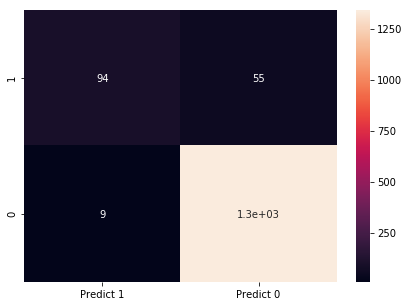

In [87]:
#Plotting the confusion Matrix 
print("Confusion Matrix")
cm = metrics.confusion_matrix(y_test, y_predict, labels=[1,0])
df_cm = pd.DataFrame(cm, index=[i for i in ["1","0"]], columns =[i for i in["Predict 1", "Predict 0"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm, annot=True)

# Naive Bayes Model

In [76]:
#Fitting the Naive bayes model on the training data
ploan_nb_model = GaussianNB()
ploan_nb_model.fit(x_train,y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [81]:
#Performance of our model with training data
y_nb_predict_train = ploan_nb_model.predict(x_train)

print( "Model Accuracy: {0:4f}".format(metrics.accuracy_score(y_train,y_nb_predict_train)))

Model Accuracy: 0.896857


In [85]:
#Performance of our model with testing data 

y_nb_predict_test = ploan_nb_model.predict(x_test)
print( "Model Accuracy :{0:4f}".format(metrics.accuracy_score(y_test,y_nb_predict_test)))

Model Accuracy :0.886667


confusion matrix


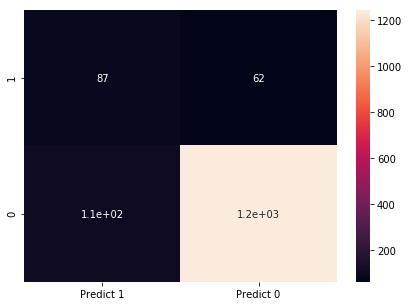

In [94]:
#Plotting Confusion matrix for Naive Bayes Model
print("confusion matrix")
cm = metrics.confusion_matrix(y_test, y_nb_predict_test, labels=[1,0])
df_cm = pd.DataFrame(cm, index=[i for i in ["1","0"]],columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm,annot=True)

In [96]:
#Printing out the classification report to find out the precision and recall 
print("Classification report")
print(metrics.classification_report(y_test, y_nb_predict_test, labels=[1,0]))

Classification report
              precision    recall  f1-score   support

           1       0.45      0.58      0.51       149
           0       0.95      0.92      0.94      1351

   micro avg       0.89      0.89      0.89      1500
   macro avg       0.70      0.75      0.72      1500
weighted avg       0.90      0.89      0.89      1500



# KNN Model

In [177]:
#Building KNN model. Chose a KNN value as sqrt of n. Where n = 5000 and 70% is training data which is 3500 so sqrt is 59 
ploan_knn_model_withoutZscore = KNeighborsClassifier(n_neighbors= 59, weights ='distance')
ploan_knn_model_withoutZscore.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=59, p=2,
           weights='distance')

In [178]:
#Predicting from the test data
y_predict_KNN = ploan_knn_model_withoutZscore.predict(x_test)

#Checking model score train data 
ploan_knn_model_withoutZscore.score(x_train,y_train)

1.0

In [179]:
#Checking model score test data
ploan_knn_model_withoutZscore.score(x_test,y_test)

0.904

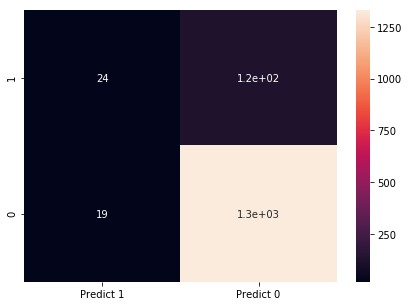

In [180]:
cm = metrics.confusion_matrix(y_test, y_predict_KNN, labels=[1,0])
df_cm = pd.DataFrame(cm, index=[i for i in ["1","0"]], columns=[i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm, annot=True)

In [101]:
#Building the KNN model with Z score
xscaled = x.apply(zscore)
xscaled.describe()

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_Advanced/Professional,Education_Graduate,Education_Undergrad
count,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03
mean,2.478018e-17,-1.693312e-16,1.939449e-16,7.850609e-16,-2.078338e-17,2.810197e-16,5.092149e-16,4.426903e-16,2.986500e-16,-3.697931e-16,-3.148592e-17,-2.122302e-16,-6.365575e-16
std,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00
min,-1.948906e+00,-2.014911e+00,-1.428969e+00,-1.216855e+00,-1.108987e+00,-5.555239e-01,-3.414233e-01,-2.535403e-01,-1.216618e+00,-6.453143e-01,-6.549654e-01,-6.245376e-01,-8.495664e-01
25%,-9.019702e-01,-8.812043e-01,-7.554825e-01,-1.216855e+00,-7.084116e-01,-5.555239e-01,-3.414233e-01,-2.535403e-01,-1.216618e+00,-6.453143e-01,-6.549654e-01,-6.245376e-01,-8.495664e-01
50%,-2.952359e-02,-9.121982e-03,-2.123482e-01,-3.454321e-01,-2.506106e-01,-5.555239e-01,-3.414233e-01,-2.535403e-01,8.219509e-01,-6.453143e-01,-6.549654e-01,-6.245376e-01,-8.495664e-01
75%,8.429230e-01,8.629604e-01,5.263146e-01,5.259909e-01,3.216407e-01,4.375576e-01,-3.414233e-01,-2.535403e-01,8.219509e-01,1.549632e+00,1.526798e+00,1.601185e+00,1.177071e+00
max,1.889859e+00,1.996667e+00,3.263712e+00,1.397414e+00,4.613525e+00,5.688108e+00,2.928915e+00,3.944146e+00,8.219509e-01,1.549632e+00,1.526798e+00,1.601185e+00,1.177071e+00


In [143]:
#Train and test data using the x scaled version
X_train, X_test, Y_train, Y_test = train_test_split(xscaled, y, test_size=0.30, random_state=1)

In [181]:
#Building KNN model
ploan_knn_model = KNeighborsClassifier(n_neighbors= 59, weights ='distance')
ploan_knn_model.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=59, p=2,
           weights='distance')

In [182]:
#Predicting from the test data
Y_predict_KNN = ploan_knn_model.predict(X_test)

#Checking model score train data 
ploan_knn_model.score(X_train,Y_train)

1.0

In [183]:
#Checking model score test data
ploan_knn_model.score(X_test,Y_test)

0.9333333333333333

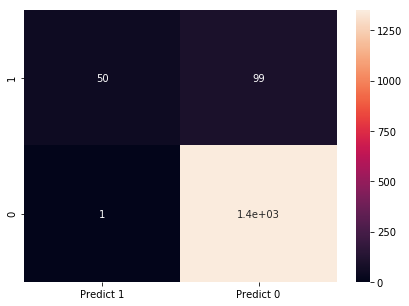

In [184]:
cm = metrics.confusion_matrix(Y_test, Y_predict_KNN, labels=[1,0])
df_cm = pd.DataFrame(cm, index=[i for i in ["1","0"]], columns=[i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm, annot=True)

# Best Model : 
We have found the score and the confusion matrix using the methods Logistic Regression, Naive Bayes and KNN.Out of these three we can take Naive Bayes from the comparison as it has lesser accuracy and more Type 1 and Type 2 errors. Comparing Logistic and KNN : Logistic has good model score in terms of both train and test as well less Type I and Type II errors. KNN on the other hand has provided an ideal score in train model but its lesser in test model when comparing to logistic regression. The KNN nearest neigbors when used ideal which is sqrt of n in this case is 59 has more errors and less test model score and when reducing a lot and gives 5 or 6 it gives good model and reduces Type I and Type II errors but it can also overfit in another set of data.KNN gives a lot of difference applying ZScore which is a better model than applying ZScore.On Logistic regression model the difference of score between Train and Test model is very less and it closely matches and it gives the minimum Type I and Type II errors comparing all the models so in this case Logistic Regression is  the best model